In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as psubs
from sklearn.neighbors import KNeighborsClassifier as KNC 
from sklearn.model_selection import train_test_split as TTS


ModuleNotFoundError: No module named 'numpy'

In [ ]:
# loading the dataset 
df = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.shape

(1259, 27)

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# exploring the missing data
df.isnull().sum()
# state    515/1259 (40%)
# work_interfere  264/1259 (20%)
# comments       1095/1259 (86%) 
# self_employed  18/ 1259 (1%)





Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
df.describe(include='O')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


In [ ]:
# dealing with the missing data
# 1️⃣ self_employed only 1% of the data is missed so we can use the mode
df['self_employed'].value_counts()
# the no is the common answer

No     1095
Yes     146
Name: self_employed, dtype: int64

In [ ]:
# fillig the missing
df['self_employed'].fillna('NO', inplace=True)
# checking ✅ 
df['self_employed'].isnull().sum()

0

In [ ]:
# 2️⃣ work_interfere 20% missing 
# work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [ ]:
# let's delay filling the missing data and to make a encode the data into a numerical form
# to be able to study the dataset correlation
df.select_dtypes(include='O')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,Female,United States,IL,NO,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,M,United States,IN,NO,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,Male,Canada,NaN,NO,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,Male,United Kingdom,NaN,NO,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,Male,United States,TX,NO,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
# dealing with Timestamp
# we have some options
# 1️⃣ 
# extract year | month | day | hours | ... and so on ...
# 2️⃣ 
# Date Difference from a specific date can be the min date value when the survey is done in days, weeks, or months.
# 3️⃣ 
# Time Since a specific date 
# OR even is the date matters in our problem ?🤔 
# it's more like a soical study if the time an important factor how can we build thoery on it hmm
# I think if it's valid for sometime we just need to know the boundries 
# so befor a decision is made 


In [ ]:
df['Date'] = pd.to_datetime(df['Timestamp'])
df.drop('Timestamp', axis=1, inplace=True)
df.sample(7)


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Date
704,43,M,United States,TN,No,Yes,Yes,Sometimes,26-100,No,...,Yes,No,No,No,No,No,No,No,NaN,2014-08-28 09:59:39
571,42,Make,United States,CA,No,No,Yes,Often,More than 1000,No,...,Maybe,Maybe,Yes,Yes,Maybe,Maybe,Don't know,No,NaN,2014-08-27 20:17:52
449,37,Male,Canada,NaN,No,Yes,Yes,Rarely,More than 1000,No,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN,2014-08-27 15:51:36
282,18,male,United States,TX,No,No,Yes,Sometimes,6-25,No,...,Yes,No,No,No,No,Maybe,Don't know,No,NaN,2014-08-27 14:10:15
1072,41,M,United States,IL,No,No,No,Rarely,More than 1000,No,...,Maybe,Maybe,Some of them,No,No,No,Yes,Yes,NaN,2014-08-29 13:23:40
690,23,male,Canada,NaN,No,No,Yes,Sometimes,6-25,No,...,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN,2014-08-28 09:54:38
816,39,Male,United States,FL,No,Yes,Yes,Sometimes,500-1000,No,...,Maybe,No,Some of them,Yes,No,No,Don't know,No,NaN,2014-08-28 14:38:50


In [ ]:
df['Date'].describe(datetime_is_numeric=True)
# yyyy/ mm/ dd hh: mm: ss
# start date 2014-08-27 11:29:31
# end date 2016-02-01 23:04:31

count                             1259
mean     2014-09-10 00:15:52.177124864
min                2014-08-27 11:29:31
25%                2014-08-27 14:26:56
50%                2014-08-28 02:30:00
75%         2014-08-28 23:36:48.500000
max                2016-02-01 23:04:31
Name: Date, dtype: object

In [ ]:
df['Date'].value_counts()

2014-08-27 12:44:51    2
2014-08-27 14:22:43    2
2014-08-27 12:31:41    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
                      ..
2014-08-27 15:35:21    1
2014-08-27 15:34:32    1
2014-08-27 15:34:31    1
2014-08-27 15:34:23    1
2016-02-01 23:04:31    1
Name: Date, Length: 1246, dtype: int64

In [ ]:
# so a middle option is just to keep the year 
# df['Year'] = df['Date'].dt.year
# let's earn some time
ymap = {2014 : 0, 2015 : 1, 2016 : 2}
df['Year'] = df['Date'].dt.year.map(ymap)
df.drop('Date', axis=1, inplace=True)
df.sample(7)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year
807,36,f,United States,CA,No,Yes,No,NaN,6-25,No,...,No,No,No,Some of them,No,Maybe,Yes,No,NaN,0
522,35,Male,United States,AZ,No,No,No,NaN,More than 1000,No,...,Maybe,Maybe,No,No,No,No,No,No,NaN,0
295,24,Female,United States,CA,No,No,No,NaN,500-1000,No,...,Maybe,Maybe,Some of them,No,No,Maybe,No,No,NaN,0
971,30,Male,United Kingdom,NaN,Yes,No,Yes,Sometimes,6-25,No,...,Yes,Yes,No,No,No,No,Yes,Yes,NaN,0
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,1
661,27,Male,United Kingdom,NaN,No,No,No,Never,1-5,No,...,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No,NaN,0
268,37,Female,United States,CA,No,Yes,Yes,Often,26-100,No,...,Maybe,No,Some of them,Some of them,No,Yes,Don't know,No,NaN,0


In [ ]:
# Gender
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [ ]:
# what a mess I see
# some misspling some with same meaning and other stupid people
# ok let's start with lowering all the case
df['Gender'] = df['Gender'].str.lower()
counts = df['Gender'].value_counts()
counts

male                                              821
female                                            183
m                                                 150
f                                                  53
woman                                               4
make                                                4
male                                                3
cis male                                            3
female                                              2
man                                                 2
female (trans)                                      2
neuter                                              1
male leaning androgynous                            1
trans woman                                         1
msle                                                1
female (cis)                                        1
queer                                               1
cis-female/femme                                    1
mail                        

In [ ]:
def map_gender(v):
    if counts[v] <= 2:
        return 'identity_problems'
    else:
        return v
df['Gender'] = df['Gender'].map(map_gender)
counts2 = df.Gender.value_counts()
counts2


male                 821
female               183
m                    150
f                     53
identity_problems     38
woman                  4
make                   4
cis male               3
male                   3
Name: Gender, dtype: int64

In [ ]:
maping = {
    'male' : 0 ,
    'm' : 0,
    'male' :0,
    'make' : 0,
    'cis male' : 0,
    'f' : 1,
    'female' : 1,
    'woman' : 1,
    'identity_problems' : 2
}
df['Gender'] = df['Gender'].map(maping)
df['Gender'] = df['Gender'].fillna(0)
df.Gender.value_counts()


0.0    981
1.0    240
2.0     38
Name: Gender, dtype: int64

In [ ]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year
0,37,1.0,United States,IL,NO,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,0
1,44,0.0,United States,IN,NO,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,0
2,32,0.0,Canada,NaN,NO,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,0
3,31,0.0,United Kingdom,NaN,NO,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,0
4,31,0.0,United States,TX,NO,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0


In [ ]:
ct = df.Country.value_counts()
countries, conts = ct.index, ct.values
ct.index, ct.values

(Index(['United States', 'United Kingdom', 'Canada', 'Germany', 'Ireland',
        'Netherlands', 'Australia', 'France', 'India', 'New Zealand', 'Poland',
        'Switzerland', 'Sweden', 'Italy', 'South Africa', 'Belgium', 'Brazil',
        'Israel', 'Singapore', 'Bulgaria', 'Austria', 'Finland', 'Mexico',
        'Russia', 'Denmark', 'Greece', 'Colombia', 'Croatia', 'Portugal',
        'Moldova', 'Georgia', 'Bahamas, The', 'China', 'Thailand',
        'Czech Republic', 'Norway', 'Romania', 'Nigeria', 'Japan', 'Hungary',
        'Bosnia and Herzegovina', 'Uruguay', 'Spain', 'Zimbabwe', 'Latvia',
        'Costa Rica', 'Slovenia', 'Philippines'],
       dtype='object'),
 array([751, 185,  72,  45,  27,  27,  21,  13,  10,   8,   7,   7,   7,
          7,   6,   6,   6,   5,   4,   4,   3,   3,   3,   3,   2,   2,
          2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1]))

In [ ]:
country_map = {}
for i, c in enumerate(conts):
    if c == conts[i] and i <= 8:
        country_map[ countries[i] ] = i
    else:
         country_map[ countries[i] ] = 9
   

country_map



{'United States': 0,
 'United Kingdom': 1,
 'Canada': 2,
 'Germany': 3,
 'Ireland': 4,
 'Netherlands': 5,
 'Australia': 6,
 'France': 7,
 'India': 8,
 'New Zealand': 9,
 'Poland': 9,
 'Switzerland': 9,
 'Sweden': 9,
 'Italy': 9,
 'South Africa': 9,
 'Belgium': 9,
 'Brazil': 9,
 'Israel': 9,
 'Singapore': 9,
 'Bulgaria': 9,
 'Austria': 9,
 'Finland': 9,
 'Mexico': 9,
 'Russia': 9,
 'Denmark': 9,
 'Greece': 9,
 'Colombia': 9,
 'Croatia': 9,
 'Portugal': 9,
 'Moldova': 9,
 'Georgia': 9,
 'Bahamas, The': 9,
 'China': 9,
 'Thailand': 9,
 'Czech Republic': 9,
 'Norway': 9,
 'Romania': 9,
 'Nigeria': 9,
 'Japan': 9,
 'Hungary': 9,
 'Bosnia and Herzegovina': 9,
 'Uruguay': 9,
 'Spain': 9,
 'Zimbabwe': 9,
 'Latvia': 9,
 'Costa Rica': 9,
 'Slovenia': 9,
 'Philippines': 9}

In [ ]:
df['Country'] = df['Country'].map(country_map)
df.sample(3)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year
1064,24,0.0,3,NaN,No,Yes,Yes,Sometimes,6-25,No,...,Maybe,No,Yes,Yes,No,No,Don't know,No,Thank you this is very important.,0
1170,29,0.0,0,IL,No,No,No,NaN,More than 1000,No,...,Maybe,No,Some of them,Yes,Maybe,Yes,No,No,NaN,0
954,38,0.0,0,TN,No,No,No,NaN,6-25,No,...,Maybe,No,Some of them,Yes,Maybe,Maybe,Don't know,No,Some of these should not be required.,0


In [ ]:
df.Country.isnull().sum()

0

In [ ]:
# 3️⃣ State drop it ❌ 
df.drop('state', axis=1, inplace=True)
df.sample(3)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year
1112,37,0.0,3,No,No,No,NaN,6-25,Yes,Yes,...,Maybe,No,Some of them,No,Maybe,Yes,Don't know,No,NaN,0
1093,25,0.0,0,No,No,Yes,Sometimes,More than 1000,No,Yes,...,Yes,No,No,No,No,No,Yes,No,NaN,0
646,25,0.0,4,No,Yes,Yes,Sometimes,26-100,No,Yes,...,Maybe,No,Some of them,Some of them,No,Maybe,No,No,NaN,0


In [ ]:
df.comments.isnull().sum()

1095

In [ ]:
# comments 1095 missing
# let's engineer it 
df.comments.value_counts()
# let's make a new feature whether he left a comment or no 


* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.                                                                                                                                                                                                                 

In [ ]:
# if comment null 1 else 0
df['iscomment'] = df['comments'].isnull().astype(int)
df['iscomment'].value_counts()

1    1095
0     164
Name: iscomment, dtype: int64

In [ ]:
df.drop('comments', axis=1, inplace=True)

In [ ]:
# work_interfere
# If you have a mental health condition, do you feel that it interferes with your work?
# that sound an important feature related to the main question
df.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [ ]:
work_map = {
    'Sometimes' : 0,
    'Never' : 1,
    'Often' : 2
}
df['work_interfere'] = df['work_interfere'].map(work_map)
df['work_interfere'] = df['work_interfere'].fillna(0)
df.work_interfere.isnull().sum()

0

In [ ]:
# perfectly no missing data ✅✅✅✅ 
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Year                         0
iscomment                    0
dtype: int64

In [ ]:
df.describe(include='O')

,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,3,2,2,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,No,No,Yes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,1095,767,637,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075


In [ ]:
for col in df.columns:
    if col == 'Age': continue
    # Age has some outliers by the way 
    print(col)
    print("-"*100)
    print(df[col].value_counts())
    print("+"*100)


Gender
----------------------------------------------------------------------------------------------------
0.0    981
1.0    240
2.0     38
Name: Gender, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Country
----------------------------------------------------------------------------------------------------
0    751
1    185
9    108
2     72
3     45
5     27
4     27
6     21
7     13
8     10
Name: Country, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
self_employed
----------------------------------------------------------------------------------------------------
No     1095
Yes     146
NO       18
Name: self_employed, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
family_history
----------------------------------------------------------------------------------------------------
N

In [ ]:
# 2️⃣ classes features
# self_employed -> mistyping NO and No
# family_history -> yes, no
# treatment -> yes, no
# remote_work -> remote_work
# tech_company -> tech_company
# 3️⃣ classes features
# benefits -> Don't know , yes, no
# care_options -> Not sure , yes, no
# AND SO ON..

In [ ]:
df.nunique()

Age                          53
Gender                        3
Country                      10
self_employed                 3
family_history                2
treatment                     2
work_interfere                3
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
Year                          3
iscomment                     2
dtype: int64

In [ ]:
# mapping them
for col in df.columns:
    if df[col].nunique() <= 6:
        df[col] = df[col].astype('category').cat.codes
df.head(10)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,iscomment
0,37,1,0,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,0,1
1,44,0,0,0,0,0,0,5,0,0,...,0,1,0,0,1,1,0,0,0,1
2,32,0,2,0,0,0,0,4,0,1,...,1,1,2,2,2,2,1,0,0,1
3,31,0,1,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,0,1
4,31,0,0,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,0,1
5,33,0,0,0,1,0,0,4,0,1,...,1,1,2,2,1,0,0,0,0,1
6,35,1,0,0,1,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
7,39,0,2,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
8,42,1,0,0,1,1,0,1,0,1,...,0,1,2,2,1,0,1,0,0,1
9,23,0,2,0,0,0,1,2,0,1,...,1,1,2,2,0,0,2,0,0,1


In [ ]:
for col in df.columns:
    if col == 'Age': continue
    # Age has some outliers by the way 
    print(col)
    print("-"*100)
    print(df[col].value_counts())
    print("+"*100)

Gender
----------------------------------------------------------------------------------------------------
0    981
1    240
2     38
Name: Gender, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Country
----------------------------------------------------------------------------------------------------
0    751
1    185
9    108
2     72
3     45
5     27
4     27
6     21
7     13
8     10
Name: Country, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
self_employed
----------------------------------------------------------------------------------------------------
1    1095
2     146
0      18
Name: self_employed, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
family_history
----------------------------------------------------------------------------------------------------
0    767
1   

In [ ]:
# we need only to rescale the Age or make a feature for Age intervals
# some values are realy missed up 🥲 
df.Age.value_counts()[::-1]

 72              1
 329             1
 58              1
 62              1
 65              1
-1726            1
-29              1
 53              1
 61              1
 8               1
 11              1
-1               1
 5               1
 99999999999     1
 60              2
 47              2
 55              3
 54              3
 57              3
 56              4
 49              4
 51              5
 20              6
 50              6
 48              6
 18              7
 19              9
 44             11
 46             12
 45             12
 21             16
 42             20
 41             21
 22             21
 43             28
 39             33
 40             33
 36             37
 38             39
 37             43
 24             46
 23             51
 35             55
 25             61
 30             63
 34             65
 31             67
 28             68
 33             70
 27             71
 26             75
 32             82
 29         

In [ ]:
df['Age'] = df['Age'].clip(lower=18, upper=80)


In [ ]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,iscomment
0,37,1,0,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,0,1
1,44,0,0,0,0,0,0,5,0,0,...,0,1,0,0,1,1,0,0,0,1
2,32,0,2,0,0,0,0,4,0,1,...,1,1,2,2,2,2,1,0,0,1
3,31,0,1,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,0,1
4,31,0,0,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,1,1,0,1,0,2,0,1,...,1,1,1,1,1,1,0,0,1,1
1255,32,0,0,1,1,1,2,2,1,1,...,1,1,1,2,1,1,2,0,1,1
1256,34,0,0,1,1,1,0,5,0,1,...,2,2,0,0,1,1,1,0,1,1
1257,46,1,0,1,0,0,0,1,1,1,...,2,1,0,0,1,1,1,0,1,1


In [ ]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Year', 'iscomment'],
      dtype='object')

In [ ]:
px.histogram(df, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

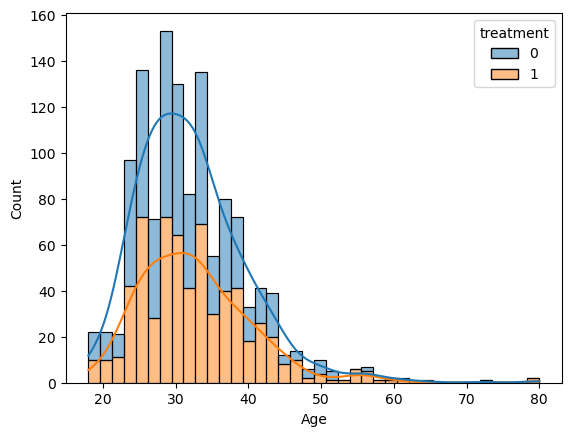

In [ ]:
sns.histplot(df, x='Age', hue='treatment', kde=True, multiple='stack')

In [ ]:
df.shape

(1259, 26)

In [ ]:
# this survey is about things in workplace mostly if you are older you don't or outliers 
mask = df['Age'] <= 50
# Drop the rows where Age > 50 using the mask
df.drop(index=df[~mask].index, inplace=True)
df.shape


(1231, 26)

In [ ]:
px.histogram(df, x='Age')

In [ ]:
df_exp = df.copy()
# test the option of using the scaler vs age intervals
df_exp

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,iscomment
0,37,1,0,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,0,1
1,44,0,0,0,0,0,0,5,0,0,...,0,1,0,0,1,1,0,0,0,1
2,32,0,2,0,0,0,0,4,0,1,...,1,1,2,2,2,2,1,0,0,1
3,31,0,1,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,0,1
4,31,0,0,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,1,1,0,1,0,2,0,1,...,1,1,1,1,1,1,0,0,1,1
1255,32,0,0,1,1,1,2,2,1,1,...,1,1,1,2,1,1,2,0,1,1
1256,34,0,0,1,1,1,0,5,0,1,...,2,2,0,0,1,1,1,0,1,1
1257,46,1,0,1,0,0,0,1,1,1,...,2,1,0,0,1,1,1,0,1,1


In [ ]:
df_exp['Age_int'] = pd.cut(df_exp['Age'], 4,  labels=[0, 1, 2, 3])
df_exp['Age_int'].value_counts()

1    571
0    298
2    281
3     81
Name: Age_int, dtype: int64

In [ ]:
df_exp.drop('Age', axis=1, inplace=True)

In [ ]:
df_exp.head(7)

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,iscomment,Age_int
0,1,0,0,0,1,2,4,0,1,2,...,1,1,2,1,0,2,0,0,1,2
1,0,0,0,0,0,0,5,0,0,0,...,1,0,0,1,1,0,0,0,1,3
2,0,2,0,0,0,0,4,0,1,1,...,1,2,2,2,2,1,0,0,1,1
3,0,1,0,1,1,2,2,0,1,1,...,2,1,0,0,0,1,1,0,1,1
4,0,0,0,0,0,1,1,1,1,2,...,1,1,2,2,2,0,0,0,1,1
5,0,0,0,1,0,0,4,0,1,2,...,1,2,2,1,0,0,0,0,1,1
6,1,0,0,1,1,0,0,1,1,1,...,0,1,0,1,1,0,0,0,1,2


In [ ]:
px.histogram(df_exp, x='Age_int')

In [ ]:
# scaling the AGE I am not going to make age intervals 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head(7)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,iscomment
0,0.854493,1,0,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,0,1
1,1.940666,0,0,0,0,0,0,5,0,0,...,0,1,0,0,1,1,0,0,0,1
2,0.078655,0,2,0,0,0,0,4,0,1,...,1,1,2,2,2,2,1,0,0,1
3,-0.076512,0,1,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,0,1
4,-0.076512,0,0,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,0,1
5,0.233823,0,0,0,1,0,0,4,0,1,...,1,1,2,2,1,0,0,0,0,1
6,0.544158,1,0,0,1,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1


In [ ]:
px.histogram(df, x='Age')

In [ ]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,iscomment
0,0.854493,1,0,0,0,1,2,4,0,1,...,1,1,1,2,1,0,2,0,0,1
1,1.940666,0,0,0,0,0,0,5,0,0,...,0,1,0,0,1,1,0,0,0,1
2,0.078655,0,2,0,0,0,0,4,0,1,...,1,1,2,2,2,2,1,0,0,1
3,-0.076512,0,1,0,1,1,2,2,0,1,...,2,2,1,0,0,0,1,1,0,1
4,-0.076512,0,0,0,0,0,1,1,1,1,...,1,1,1,2,2,2,0,0,0,1


In [ ]:
# Spliting for df
X = df.loc[:, ~ df.columns.isin(['treatment'])]
y = df['treatment']
# Spliting for the experment 
X_exp = df_exp.loc[:, ~ df_exp.columns.isin(['treatment']) ]
y_exp = df_exp['treatment']

In [ ]:
# the data is ready for the model 
# Spliting the data
X_train, X_test, y_train, y_test = TTS(X, y, test_size=1/3)
X_train2, X_test2, y_train2, y_test2  = TTS(X_exp, y_exp, test_size=1/3)


In [ ]:
model = KNC() # default
model2 = KNC() # exp the use of age-interval
model.fit(X_train, y_train)
model2.fit(X_train2, y_train2)
one_pred = model.predict(X_test)
two_pred = model2.predict(X_test2)

In [ ]:
from sklearn.metrics import classification_report
print("First model")
print(classification_report(y_test, one_pred))
print("#"*100)
print(classification_report(y_test2, two_pred))


First model
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       199
           1       0.66      0.50      0.57       212

    accuracy                           0.61       411
   macro avg       0.62      0.61      0.61       411
weighted avg       0.62      0.61      0.61       411

####################################################################################################
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       204
           1       0.63      0.56      0.59       207

    accuracy                           0.61       411
   macro avg       0.61      0.61      0.61       411
weighted avg       0.61      0.61      0.61       411



In [ ]:
from sklearn.metrics import accuracy_score
print("First model")
print(accuracy_score(y_test, one_pred))
print("#"*100)
print("Second model")
print(accuracy_score(y_test2, two_pred))

First model
0.610705596107056
####################################################################################################
Second model
0.610705596107056


In [ ]:
# firs model better with default let's enhance it

In [ ]:
train_errors = []
test_errors = []
ks = [i for i in range(1, 11)]
for k in ks:
    knn = KNC(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_error =  accuracy_score(y_train, y_train_pred)
    test_error =   accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Print the training and testing errors for each k value
for k, train_error, test_error in zip(ks, train_errors, test_errors):
    print('k =', k, 'Train error:', train_error, 'Test error:', test_error)

k = 1 Train error: 1.0 Test error: 0.6301703163017032
k = 2 Train error: 0.7621951219512195 Test error: 0.5766423357664233
k = 3 Train error: 0.8097560975609757 Test error: 0.6228710462287105
k = 4 Train error: 0.7280487804878049 Test error: 0.559610705596107
k = 5 Train error: 0.7524390243902439 Test error: 0.610705596107056
k = 6 Train error: 0.7085365853658536 Test error: 0.5912408759124088
k = 7 Train error: 0.7170731707317073 Test error: 0.6180048661800487
k = 8 Train error: 0.7170731707317073 Test error: 0.5985401459854015
k = 9 Train error: 0.7073170731707317 Test error: 0.610705596107056
k = 10 Train error: 0.6939024390243902 Test error: 0.5961070559610706


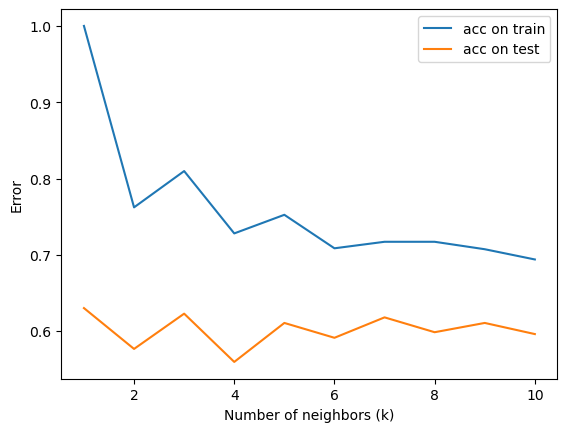

In [ ]:
sns.lineplot(x=ks, y=train_errors, label='acc on train')
sns.lineplot(x=ks, y=test_errors, label='acc on test')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forPred = forest.predict(X_test)
print(forest.score(X_test, y_test))

0.7274939172749392


In [ ]:
print(classification_report(y_test, forPred))


              precision    recall  f1-score   support

           0       0.70      0.76      0.73       199
           1       0.76      0.70      0.73       212

    accuracy                           0.73       411
   macro avg       0.73      0.73      0.73       411
weighted avg       0.73      0.73      0.73       411



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding performance
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best performance: {grid_search.best_score_}")
'''
Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best performance: 0.7390243902439024
'''